In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## profiling

In [2]:
L2READTR = 'l2_read_transactions'
L2WRITETR = 'l2_write_transactions'
DRAMREADB = 'dram_read_bytes'
DRAMWRITEB = 'dram_write_bytes'

sizes = ['3mb','6mb','12mb','24mb']

In [11]:
i = 2

In [12]:
l2rt = pd.read_csv('./src/nccl/'+ sizes[i] + '/' +L2READTR + '.csv')
l2rt = l2rt.drop(0)
l2rt = l2rt.reset_index(drop=True)


l2wt = pd.read_csv('./src/nccl/'+ sizes[i] + '/' + L2WRITETR + '.csv')
l2wt = l2wt.drop(0)
l2wt = l2wt.reset_index(drop=True)


dramrb = pd.read_csv('./src/nccl/'+ sizes[i] + '/' + DRAMREADB + '.csv')
dramrb = dramrb.drop(0)
dramrb = dramrb.reset_index(drop=True)


dramwb = pd.read_csv('./src/nccl/'+ sizes[i] + '/' + DRAMWRITEB + '.csv')
dramwb = dramwb.drop(0)
dramwb = dramwb.reset_index(drop=True)

In [13]:
l2rt = l2rt[L2READTR].astype(float).to_numpy()
l2wt = l2wt[L2WRITETR].astype(float).to_numpy()

dramrb = dramrb[DRAMREADB].astype(float).to_numpy()
dramwb = dramwb[DRAMWRITEB].astype(float).to_numpy()

In [14]:
l2rb = l2rt*32
l2wb = l2wt*32

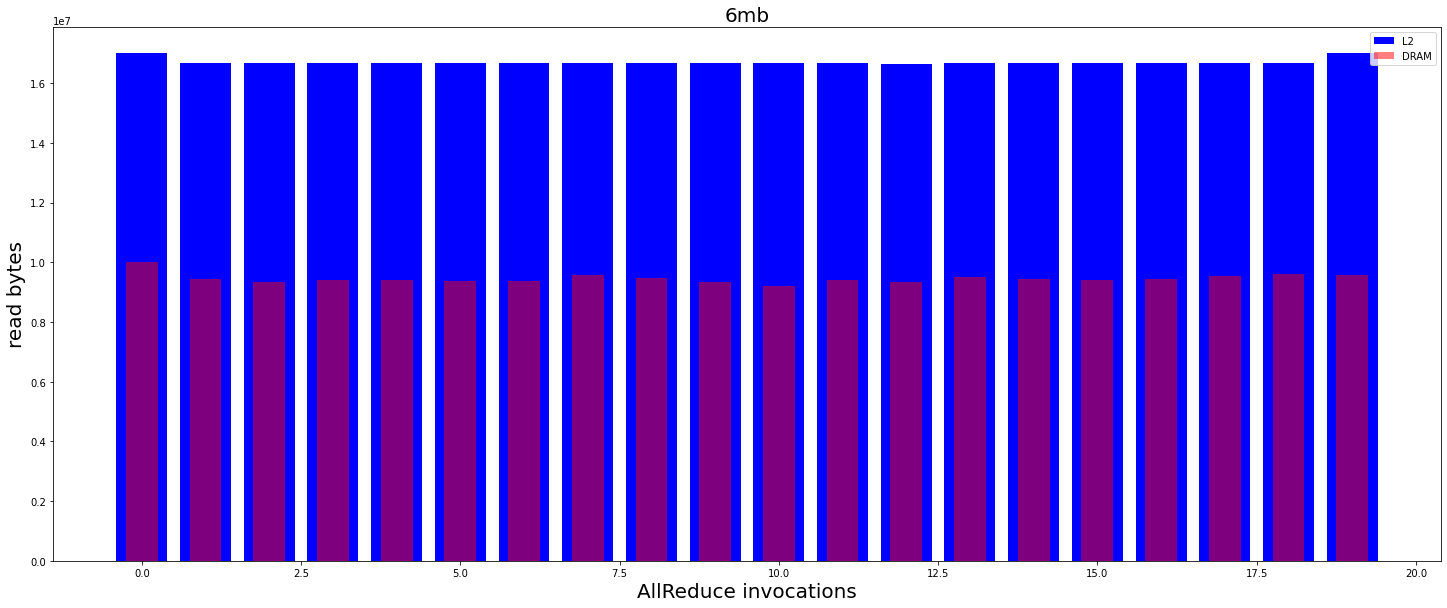

In [15]:
plot_bar_overlap(l2rb, dramrb, ylabel='read bytes', xlabel='AllReduce invocations', label1='L2', label2='DRAM', width1=0.8, width2=0.5, title=sizes[i])

In [16]:
print("read hitrate {}%".format((100*(l2rb-dramrb)/l2rb).mean()))


read hitrate 43.363760297820285%


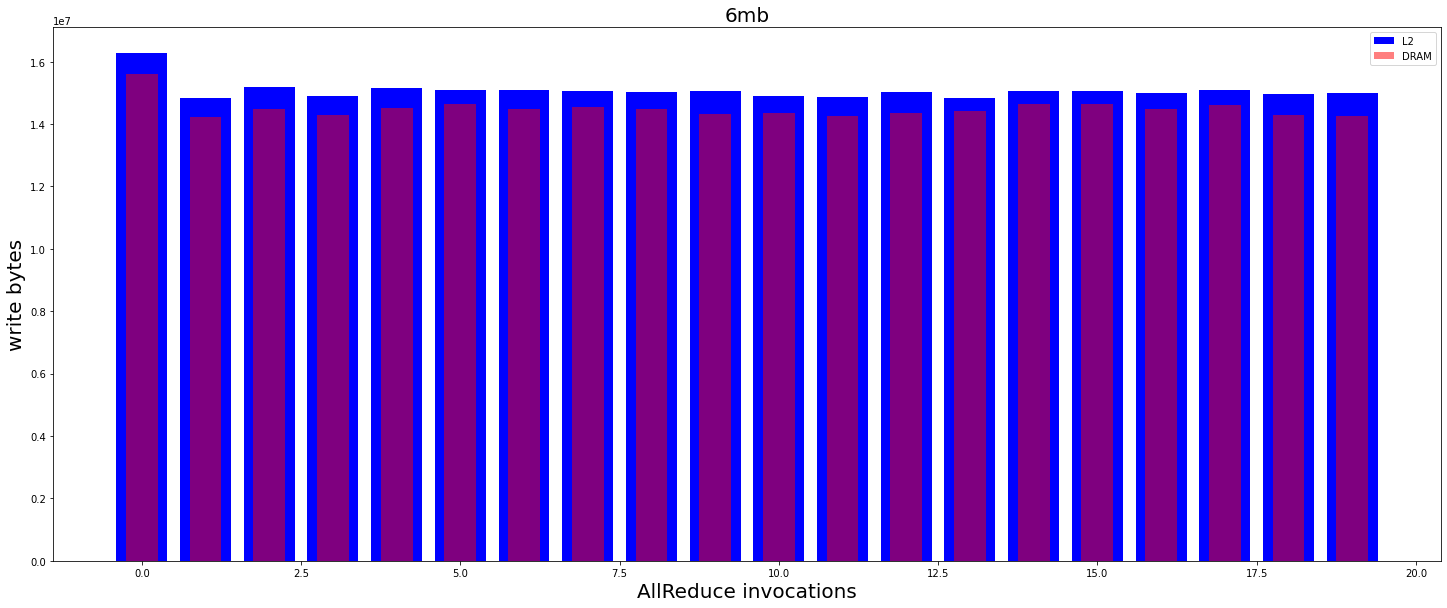

In [17]:
plot_bar_overlap(l2wb, dramwb, ylabel='write bytes', xlabel='AllReduce invocations', label1='L2', label2='DRAM', width1=0.8, width2=0.5, title=sizes[i])

In [18]:
print("write hitrate {}%".format((100*(l2wb-dramwb)/l2wb).mean()))


write hitrate 3.8245206171312587%
